In [2]:
'''
https://gist.github.com/jetesdal/dd8df57b643eee0f7cde5badc5a6f002
'''
import xarray as xr # requires >= 0.15.1
import numpy as np
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
%matplotlib inline

<H1>Global overturning (AMOC)</H1>

In [3]:
idir = '/g/data/p66/ars599/CMIP6/APP_output/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p2f1/Omon/msftmz/gn/v20230516/'
f1name = idir+'msftmz_Omon_ACCESS-CM2_piControl_r1i1p2f1_gn_0*.nc'

idir = '/g/data/p66/ars599/CMIP6/APP_output/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p3f1/Omon/msftmz/gn/v20230517/'
f2name = idir+'msftmz_Omon_ACCESS-CM2_piControl_r1i1p3f1_gn_0*.nc'

# ds = xr.open_dataset(fname)
ds1 = xr.open_mfdataset(f1name, combine='by_coords')
ds2 = xr.open_mfdataset(f2name, combine='by_coords')

ds1

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

<xarray.Dataset>
Dimensions:    (time: 372, bnds: 2, basin: 3, lev: 50, lat: 300)
Coordinates:
  * time       (time) object 0500-01-16 12:00:00 ... 0530-12-16 12:00:00
    sector     (basin) |S21 dask.array<chunksize=(3,), meta=np.ndarray>
  * lev        (lev) float64 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
  * lat        (lat) float64 -77.75 -77.51 -77.26 -77.01 ... 89.1 89.55 90.0
Dimensions without coordinates: bnds, basin
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(120, 50, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(120, 300, 2), meta=np.ndarray>
    msftmz     (time, basin, lev, lat) float32 dask.array<chunksize=(120, 3, 50, 300), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  346615.0
    contact:                access_csiro@csiro.au
    ...                     ...
    variable_id:            msftmz
    variant_label:          r1i1p2f1
    version:                v20230516
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/af83419b-cd5a-4a63-a50d-fbe472e36eab

In [4]:
'''
https://mom6-analysiscookbook.readthedocs.io/en/latest/notebooks/Overturning.html
'''
gmoc1 = ds1.msftmz.sel(basin=2) * 1e-9
gmoc2 = ds2.msftmz.sel(basin=2) * 1e-9

with ProgressBar():
    gmoc1_mean = gmoc1.mean('time').load()
with ProgressBar():
    gmoc2_mean = gmoc2.mean('time').load()

gmoc1.sector

[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  2.4s


<xarray.DataArray 'sector' ()>
array(b'global_ocean', dtype='|S12')
Coordinates:
    sector   |S12 b'global_ocean'
Attributes:
    long_name:      ocean basin
    standard_name:  region

In [5]:
print(gmoc1_mean.dims)

('lev', 'lat')


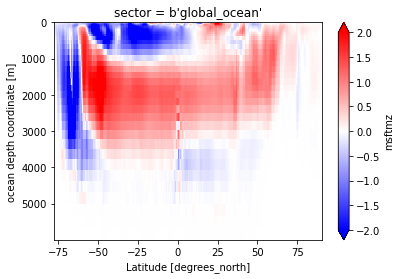

In [6]:
# Global MOC
# Plot streamfunction for any given time
diff_gmoc_mean = gmoc1_mean-gmoc2_mean
diff_gmoc_mean.plot(vmin=-2,vmax=2, yincrease=False, cmap='bwr')

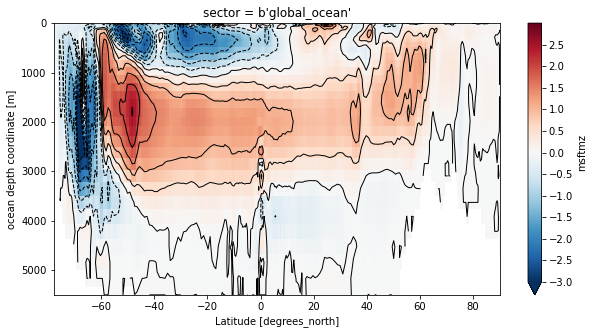

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
diff_gmoc_mean.plot(ax=ax, yincrease=False,vmin=-3,vmax=3,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-3,3,.5)})
diff_gmoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-3,0,.5),np.arange(0,3,.5)]),
                      colors='k', linewidths=1)
ax.set_ylim([5500,0])
plt.savefig('/g/data/p66/ars599/work_moc/gmoc_diff', dpi=120)
plt.show()

In [8]:
# atlantic

amoc1 = ds1.msftmz.sel(basin=0) * 1e-9
amoc2 = ds2.msftmz.sel(basin=0) * 1e-9

with ProgressBar():
    amoc1_mean = amoc1.mean('time').load()
with ProgressBar():
    amoc2_mean = amoc2.mean('time').load()

[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  1.6s


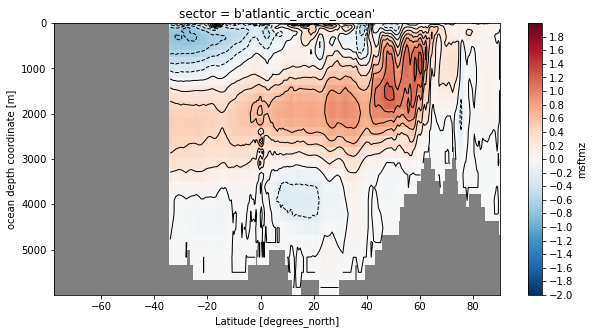

In [9]:
diff_amoc_mean = amoc1_mean-amoc2_mean

fig, ax = plt.subplots(figsize=(10,5))
diff_amoc_mean.plot(ax=ax, yincrease=False,vmin=-2,vmax=2,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-2,2,.2)})
diff_amoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-2,0,.2),np.arange(0,2,.2)]),
                      colors='k', linewidths=1)
ax.set_facecolor('grey')
plt.savefig('/g/data/p66/ars599/work_moc/amoc_diff', dpi=120)
plt.show()

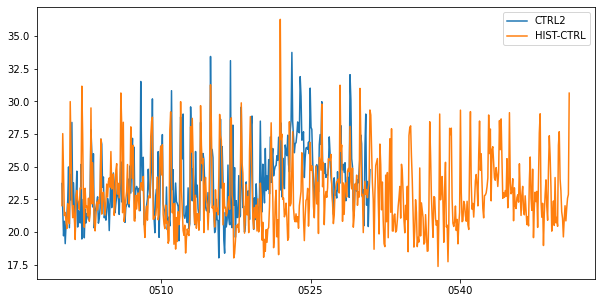

In [19]:
t1 = ds1.time
t2 = ds2.time
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(t1, amoc1.max(dim=['lat', 'lev']), label='CTRL2')
plt.plot(t2.sel(time=slice('0500', '0550')), amoc2.sel(time=slice('0500', '0550')).max(dim=['lat', 'lev']), label='HIST-CTRL')
plt.savefig('/g/data/p66/ars599/work_moc/amoc_ts', dpi=120)
plt.legend()
plt.show()

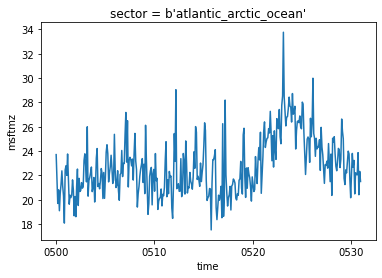

In [11]:
amoc1.sel(lat=slice(20.0, 80.0), lev=slice(100.0, 2500.0)).max(dim=['lat', 'lev']).plot()

<H1>Global overturning in density coordinates</H1>

In [12]:

idir = '/g/data/p66/ars599/CMIP6/APP_output/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p2f1/Omon/msftmrho/gn/v20230516/'
f1name = idir+'msftmrho_Omon_ACCESS-CM2_piControl_r1i1p2f1_gn_0*.nc'

idir = '/g/data/p66/ars599/CMIP6/APP_output/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p3f1/Omon/msftmrho/gn/v20230517/'
f2name = idir+'msftmrho_Omon_ACCESS-CM2_piControl_r1i1p3f1_gn_0*.nc'

ds1 = xr.open_mfdataset(f1name, combine='by_coords')
ds2 = xr.open_mfdataset(f2name, combine='by_coords')

ds1

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:    (time: 372, bnds: 2, basin: 3, rho: 80, lat: 300)
Coordinates:
  * time       (time) object 0500-01-16 12:00:00 ... 0530-12-16 12:00:00
    sector     (basin) |S21 dask.array<chunksize=(3,), meta=np.ndarray>
  * rho        (rho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
  * lat        (lat) float64 -77.75 -77.51 -77.26 -77.01 ... 89.1 89.55 90.0
Dimensions without coordinates: bnds, basin
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(372, 2), meta=np.ndarray>
    rho_bnds   (rho, bnds) float64 dask.array<chunksize=(80, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(300, 2), meta=np.ndarray>
    msftmrho   (time, basin, rho, lat) float32 dask.array<chunksize=(372, 3, 80, 300), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  346615.0
    contact:                access_csiro@csiro.au
    ...                     ...
    variable_id:            msftmrho
    variant_label:          r1i1p2f1
    version:                v20230516
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/817fca7b-eb8e-4b2f-bcea-07779dc0b644

In [13]:
gmoc1_rho2  = ds1.msftmrho.sel(basin=2) * 1e-9
gmoc2_rho2  = ds2.msftmrho.sel(basin=2) * 1e-9

with ProgressBar():
    gmoc1_rho2_mean = gmoc1_rho2.mean('time').load()

with ProgressBar():
    gmoc2_rho2_mean = gmoc2_rho2.mean('time').load()

gmoc2_rho2_mean.sector

[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  4.3s


<xarray.DataArray 'sector' ()>
array(b'global_ocean', dtype='|S12')
Coordinates:
    sector   |S12 b'global_ocean'
Attributes:
    long_name:      ocean basin
    standard_name:  region

In [14]:
gmoc2_rho2_mean.dims

('rho', 'lat')

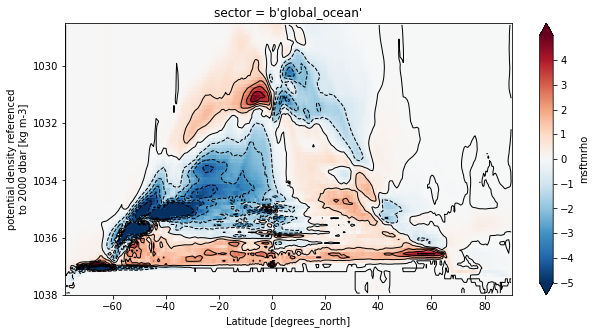

In [15]:
diff_gmoc_rho2_mean = gmoc1_rho2_mean - gmoc2_rho2_mean

fig, ax = plt.subplots(figsize=(10,5))
diff_gmoc_rho2_mean.sel(rho=slice(1028.5,None)).plot(ax=ax, yincrease=False,vmin=-5,vmax=5,cmap='RdBu_r',
                                                  cbar_kwargs={'ticks': np.arange(-5,5,1)})
diff_gmoc_rho2_mean.sel(rho=slice(1028.5,None))\
    .plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-5,0,1),np.arange(0,5,1)]),
                  colors='k', linewidths=1)
plt.savefig('/g/data/p66/ars599/work_moc/gmoc_rho_diff', dpi=120)
plt.show()

<H1>AMOC in density coordinates</H1>

In [16]:
# atlantic

amoc1_rho2 = ds1.msftmrho.sel(basin=0) * 1e-9
amoc2_rho2 = ds2.msftmrho.sel(basin=0) * 1e-9

with ProgressBar():
    amoc1_rho2_mean = amoc1_rho2.mean('time').load()
with ProgressBar():
    amoc2_rho2_mean = amoc2_rho2.mean('time').load()

[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  2.1s


In [17]:
diff_amoc_rho2_mean = amoc1_rho2_mean - amoc2_rho2_mean
# Find the location of the maximum
yq_max = diff_amoc_rho2_mean.argmax(dim=['rho', 'lat'])['lat']
rho2_i_max = diff_amoc_rho2_mean.argmax(dim=['rho', 'lat'])['rho']
print('Maximum:',
      np.round(diff_amoc_rho2_mean.isel(rho=rho2_i_max,lat=yq_max).values,1),'Sv at',
      np.round(diff_amoc_rho2_mean.lat[yq_max].values,1),'N and',
      np.round(diff_amoc_rho2_mean.rho[rho2_i_max].values,1),'kg/m^3 density')

Maximum: 8.2 Sv at -0.0 N and 1036.9 kg/m^3 density


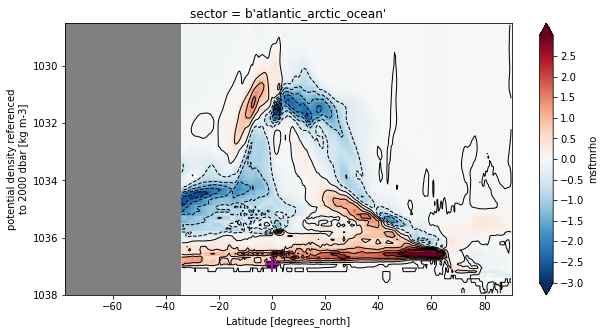

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
diff_amoc_rho2_mean.sel(rho=slice(1028.5,None)).plot(ax=ax, yincrease=False,vmin=-3,vmax=3,cmap='RdBu_r',
                                                  cbar_kwargs={'ticks': np.arange(-3,3,.5)})
diff_amoc_rho2_mean.sel(rho=slice(1028.5,None))\
    .plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-3,0,.5),np.arange(0,3,.5)]),
                  colors='k', linewidths=1)
# Plot location of maximum
ax.plot(diff_amoc_rho2_mean.lat[yq_max],diff_amoc_rho2_mean.rho[rho2_i_max],marker='+',c='m',ms=15,mew=2)
ax.set_facecolor('grey')
plt.savefig('/g/data/p66/ars599/work_moc/amoc_rho_diff', dpi=120)
plt.show()